In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('German_Credit_Data.csv')

In [3]:
data.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [4]:
n=data.describe()
n

,duration,amount,inst_rate,residing_since,age,num_credits,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,1.000000


In [5]:
c=data.describe(include='O').T
c

,count,unique,top,freq
checkin_acc,1000,4,A14,394
credit_history,1000,5,A32,530
savings_acc,1000,5,A61,603
present_emp_since,1000,5,A73,339
personal_status,1000,4,A93,548
inst_plans,1000,3,A143,814
job,1000,4,A173,630


In [96]:
#Missing Value Check!
data.isna().sum()

checkin_acc          0
duration             0
credit_history       0
amount               0
savings_acc          0
present_emp_since    0
inst_rate            0
personal_status      0
residing_since       0
age                  0
inst_plans           0
num_credits          0
job                  0
status               0
dtype: int64

In [32]:
# Checking zero variance
for i in n.columns:
    print(f'Variance of {i} is',data[i].var())

Variance of duration is 145.41500600600645
Variance of amount is 7967843.470906904
Variance of inst_rate is 1.2515225225225115
Variance of residing_since is 1.2181931931932026
Variance of age is 129.40128528528504
Variance of num_credits is 0.33368468468468354
Variance of status is 0.21021021021021277


# Univariate Analysis

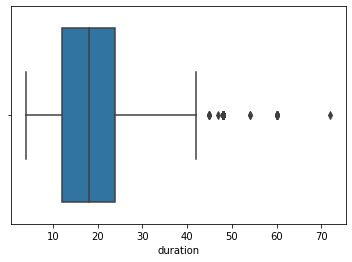

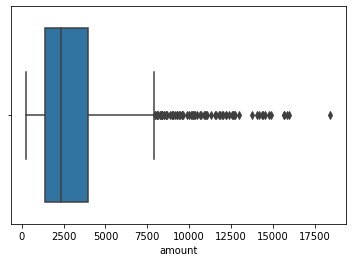

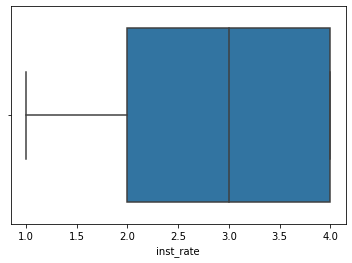

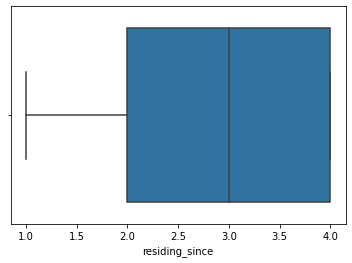

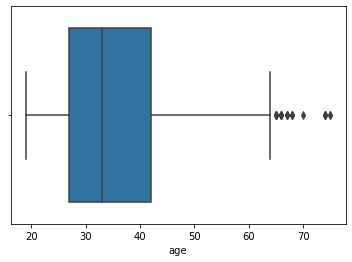

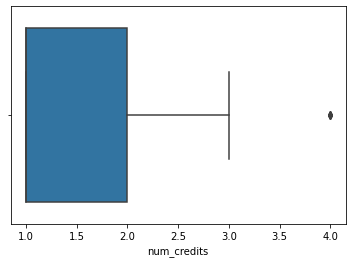

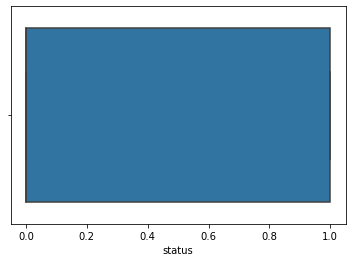

In [24]:
for i in n.columns:
    sns.boxplot(x=i,data=data)
    plt.show()

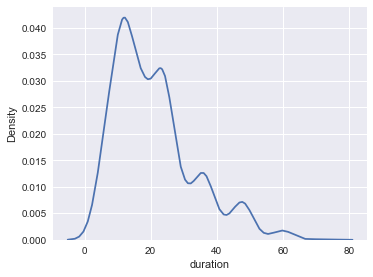

In [113]:
plt.style.use('seaborn')
plt.figure(figsize=(5,4))
sns.kdeplot(x='duration',data=data)
plt.show()

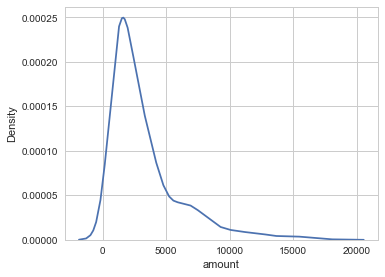

In [101]:
plt.figure(figsize=(5,4))
plt.style.use('seaborn-whitegrid')
sns.kdeplot(x='amount',data=data)
plt.show()

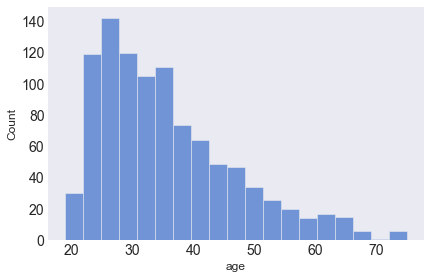

In [16]:
plt.style.use('seaborn-dark')
sns.histplot(x='age',data=data)
plt.show()

<AxesSubplot:xlabel='num_credits', ylabel='count'>

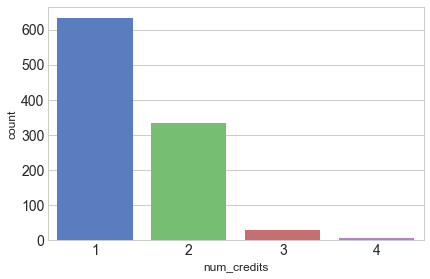

In [43]:
sns.countplot(x='num_credits',data=data)

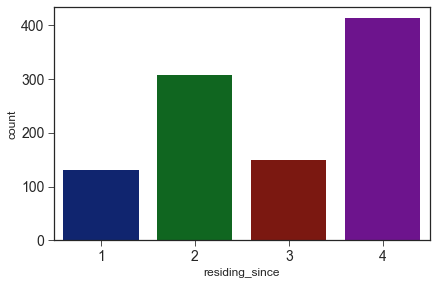

In [55]:
sns.countplot(x='residing_since',data=data)
plt.show()

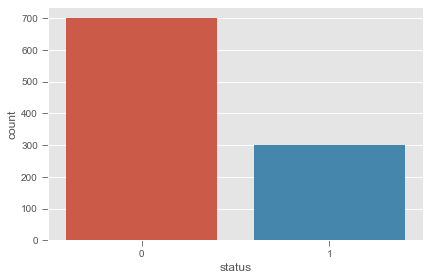

In [64]:
plt.style.use('ggplot')
sns.countplot(x='status',data=data)
plt.show()

In [114]:
#0 is not a defaulter
#1 is defaulter

# Bivariate Analysis

In [110]:
data.columns

Index(['checkin_acc', 'duration', 'credit_history', 'amount', 'savings_acc',
       'present_emp_since', 'inst_rate', 'personal_status', 'residing_since',
       'age', 'inst_plans', 'num_credits', 'job', 'status'],
      dtype='object')

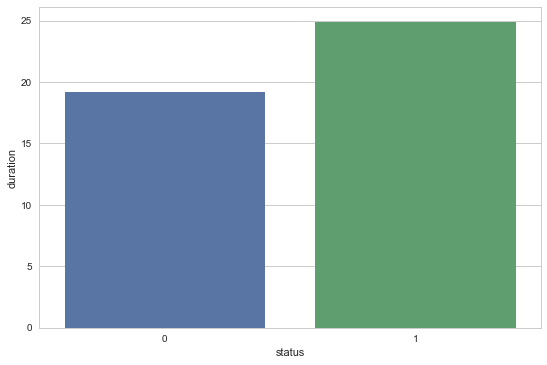

In [111]:
#How duration affects credit defaulter's status?
sns.barplot(x='status',y='duration',data=data,ci=True)
plt.show()

In [ ]:
# According to data higher duration leads to being a credit defaulter.

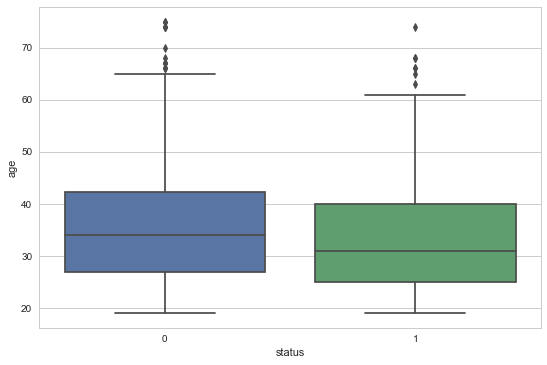

In [104]:
#What age group is more likely to be a defaulter?
sns.boxplot(x="status", y="age", data=data, orient="vertical")
plt.show()

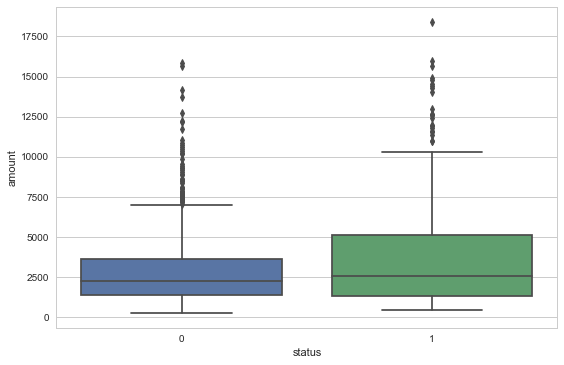

In [108]:
sns.boxplot(x="status", y="amount", data=data, orient="vertical")
plt.show()

<AxesSubplot:>

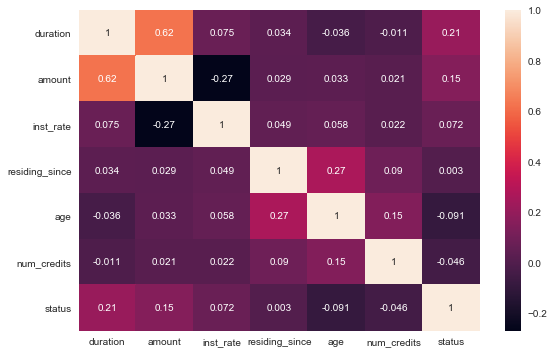

In [80]:
sns.heatmap(data.corr(),annot=True)

# Encoding

In [4]:
X_features = list(data.columns)
X_features.remove('status')
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [5]:
encoded=pd.get_dummies(data[X_features], drop_first = True)

In [6]:
x=encoded
y=data['status']

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model Selection

In [8]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_auc_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

models = {
    'LR': LogisticRegression(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'SVC': SVC(),
    'SGD': SGDClassifier(),
    'GB': GradientBoostingClassifier(),
    'Ada': AdaBoostClassifier(),
    'KNN': KNeighborsClassifier()
}

scoring = ['accuracy', 'recall', 'precision', 'roc_auc']

for model_name, model in models.items():
    model.fit(x_train, y_train)

    # Training score
    training_score = model.score(x_train, y_train)

    # Testing score
    testing_score = model.score(x_test, y_test)

    # Predictions and classification report
    y_pred = model.predict(x_test)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Recall (Sensitivity) Score
    recall = recall_score(y_test, y_pred)

    # Precision Score
    precision = precision_score(y_test, y_pred)

    result_line = f"{model_name}: Training Score={training_score:.4f}, Testing Score={testing_score:.4f}, ROC-AUC={roc_auc:.4f}, Recall={recall:.4f}, Precision={precision:.4f}"
    print(result_line)

    # Cross-validation
    print('Cross-Validation')
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = [cross_val_score(model, x_train, y_train, cv=kfold, scoring=metric).mean() for metric in scoring]

    cv_msg = f"{model_name}: ACCURACY={cv_results[0]:.4f}, RECALL={cv_results[1]:.4f}, PRECISION={cv_results[2]:.4f}, ROC-AUC={cv_results[3]:.4f}"
    print(cv_msg)

    print("\n")


LR: Training Score=0.7488, Testing Score=0.7800, ROC-AUC=0.6863, Recall=0.4576, Precision=0.6923
Cross-Validation
LR: ACCURACY=0.7200, RECALL=0.3516, PRECISION=0.5406, ROC-AUC=0.7491


DT: Training Score=1.0000, Testing Score=0.6950, ROC-AUC=0.6408, Recall=0.5085, Precision=0.4839
Cross-Validation
DT: ACCURACY=0.6712, RECALL=0.5188, PRECISION=0.4569, ROC-AUC=0.6209


RF: Training Score=1.0000, Testing Score=0.7700, ROC-AUC=0.6545, Recall=0.3729, Precision=0.7097
Cross-Validation
RF: ACCURACY=0.7400, RECALL=0.3915, PRECISION=0.6152, ROC-AUC=0.7400


SVC: Training Score=0.7075, Testing Score=0.7150, ROC-AUC=0.5219, Recall=0.0508, Precision=0.7500
Cross-Validation
SVC: ACCURACY=0.7038, RECALL=0.0793, PRECISION=0.6167, ROC-AUC=0.5809


SGD: Training Score=0.6987, Testing Score=0.7050, ROC-AUC=0.5000, Recall=0.0000, Precision=0.0000
Cross-Validation
SGD: ACCURACY=0.5625, RECALL=0.2044, PRECISION=0.0870, ROC-AUC=0.5635


GB: Training Score=0.8862, Testing Score=0.7900, ROC-AUC=0.6934, Recall

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr=LogisticRegression()

In [10]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}


In [13]:
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_params

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [14]:
lr=LogisticRegression(C=1,penalty='l2',solver='liblinear')

In [15]:
lr.fit(x_train,y_train)

LogisticRegression(C=1, solver='liblinear')

In [16]:
y_pred=lr.predict(x_test)

In [17]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lrtrain = lr.score(x_train, y_train)
print("Training score: ",lrtrain)
lrtest = lr.score(x_test, y_test)
print("Testing score: ",lrtest)

Training score:  0.75375
Testing score:  0.78


In [19]:
y_pred=lr.predict(x_test)

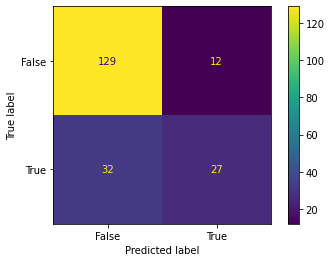

In [20]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       141
           1       0.69      0.46      0.55        59

    accuracy                           0.78       200
   macro avg       0.75      0.69      0.70       200
weighted avg       0.77      0.78      0.76       200



In [22]:
y_prob=lr.predict_proba(x_test)[:,1]

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc

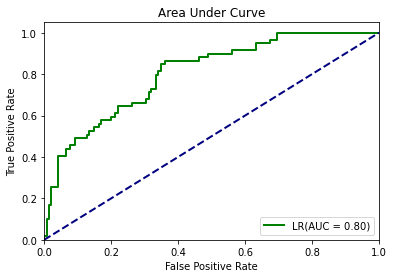

In [24]:
fpr_dt, tpr_dt, _ = roc_curve(y_test,y_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='LR(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# Random Forest 
Hyper Parameter tuning using Grid SearchCV

In [37]:
## Configuring parameters and values for searched

params = [{'max_depth': [5, 10, 15], 'n_estimators': [50, 100, 150],
           'max_features': ['sqrt', 0.2, .3, .5]}]

# square root of number of features in the dataset
# 20%, 30%, 50% of the total no. of features
## Initializing the RF classifier

modelRF = RandomForestClassifier(random_state=101)

## Configuring search with the tunable parameters

modelCV = GridSearchCV(modelRF, params, cv=10, scoring='roc_auc')

## Fitting the training set

modelCV.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=101),
             param_grid=[{'max_depth': [5, 10, 15],
                          'max_features': ['sqrt', 0.2, 0.3, 0.5],
                          'n_estimators': [50, 100, 150]}],
             scoring='roc_auc')

In [38]:
modelCV.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 150}

In [40]:
modelRF = RandomForestClassifier(n_estimators=150,max_depth=10,max_features='sqrt',random_state=101)

In [41]:
modelRF.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=150,
                       random_state=101)

In [42]:
y_predrf=modelRF.predict(x_test)

In [44]:
print(metrics.classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       141
           1       0.78      0.36      0.49        59

    accuracy                           0.78       200
   macro avg       0.78      0.66      0.67       200
weighted avg       0.78      0.78      0.75       200



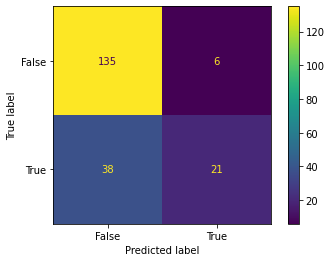

In [47]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predrf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [46]:
metrics.roc_auc_score(y_test, modelRF.predict_proba(x_test)[:,1])

0.8095924990984494

In [48]:
y_prob=modelRF.predict_proba(x_test)[:,1]

# Gradient Boost
HyperParameter tunning using GridSearchCV

In [57]:
param = [{'n_estimators': [100, 200, 400], 'learning_rate': [.01,.05,.1]}]

model = GradientBoostingClassifier(random_state=42)

modelCV = GridSearchCV(model, param, cv=10, scoring = 'roc_auc')

modelCV.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             param_grid=[{'learning_rate': [0.01, 0.05, 0.1],
                          'n_estimators': [100, 200, 400]}],
             scoring='roc_auc')

In [59]:
modelCV.best_params_

{'learning_rate': 0.05, 'n_estimators': 100}

In [60]:
gb=GradientBoostingClassifier(learning_rate=0.05,n_estimators=100,random_state=42)

In [61]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, random_state=42)

In [62]:
y_predgb=gb.predict(x_test)

In [64]:
print(metrics.classification_report(y_test,y_predgb))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       141
           1       0.74      0.39      0.51        59

    accuracy                           0.78       200
   macro avg       0.76      0.67      0.68       200
weighted avg       0.77      0.78      0.76       200



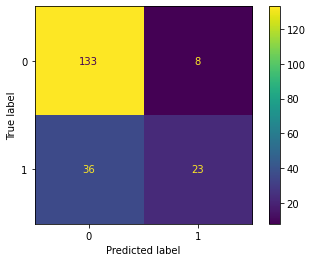

In [66]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [67]:
metrics.roc_auc_score(y_test, gb.predict_proba(x_test)[:,1])

0.8325519894218054

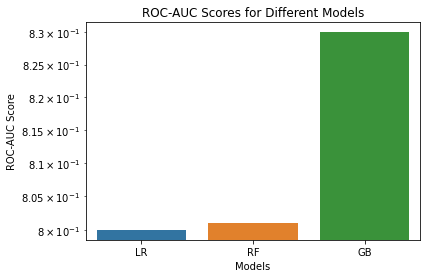

In [72]:
models_roc={'LR':0.80,'RF':0.801,'GB':0.83}
#plotting
fig, ax = plt.subplots()
sns.barplot(x=list(models_roc.keys()), y=list(models_roc.values()))
ax.set_yscale('log') #Setting logarithmic scale to visualize difference in better way.
plt.xlabel('Models')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Scores for Different Models')
plt.show()